In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

SI

In [2]:
def new_graph(size, initial_infections, neighbors_connected, prob_connection):
  G = nx.newman_watts_strogatz_graph(size,neighbors_connected,prob_connection)
  pos = nx.spring_layout(G, seed = 225)
  initial = np.zeros(size)#all healthy
  random_infections = np.random.randint(0,high=size,size=initial_infections) #randomly choose infected nodes
  initial[random_infections] = 1 #chosen nodes become infected
  initial_dict = dict(enumerate(initial, 0))
  nx.set_node_attributes(G,initial_dict,"health")
  healthy = [x for x,y in G.nodes(data=True) if y['health']==0]
  infected = [x for x,y in G.nodes(data=True) if y['health']==1]
  n_infected = [len(infected)]
  return G, healthy, infected, pos, n_infected


def evolve_one_node(G, healthy, infected, b, i):
    n_inf = len([G.nodes[n]['health'] for n in G.neighbors(i) if G.nodes[n]['health']==1])#number of infected neighbors
    prob_not_infected = (1-b)**(n_inf)#probability of remaining healthy despite having n_inf infected neighbors

#we draw a random number from a uniform dist, if it's larger than prob_not_infected, the node gets infected
    if (np.random.random()>=prob_not_infected):
      G.nodes[i]['health']=1
      infected.append(i)
      healthy.remove(i)


def evolve_all(G, healthy, infected, b,n_infected):
  for i in healthy:#expose all healthy nodes to their infected neighbors
    evolve_one_node(G, healthy, infected, b, i)

  n_infected.append(len(infected))


def evolve_until_all_infected(G, healthy, infected, b, n_infected, pos, color_dict, size, draw = True, steps = 5, final = True):
  time = 0
  while len(infected)<size:#while the graph isn't fully infected
    evolve_all(G, healthy, infected, b, n_infected)

    if draw ==True:# draw the partially infected graph every int(steps) time steps
      if time%steps==0:
        health_now = dict(G.nodes('health'))
        colors = [color_dict[health_now[x]] for x in health_now]
        print("time = " + str(time))
        nx.draw(G, pos,node_size=20,node_color=colors)
        plt.show()
    time +=1

  if final ==True and not(time%steps==1 and draw ==True): # draw the fully infected graph
    health_now = dict(G.nodes('health'))
    colors = [color_dict[health_now[x]] for x in health_now]
    print("time = " + str(time))
    nx.draw(G, pos,node_size=20,node_color=colors)
    plt.show()

  return n_infected, time

def plot_evolution(evolution, t):
  plt.plot(np.arange(t+1), evolution)
  plt.xlabel('time step')
  plt.ylabel('number of infected nodes')
  plt.show()



time = 0


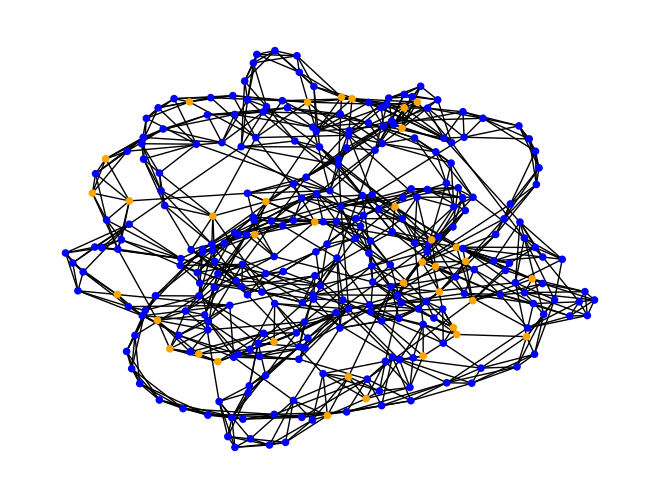

time = 5


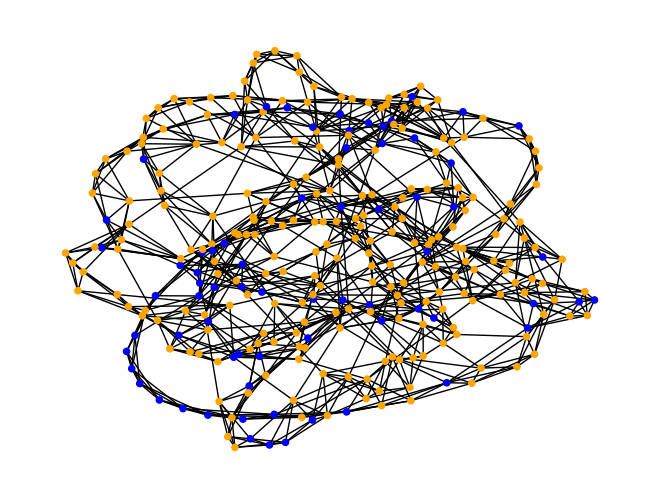

time = 10


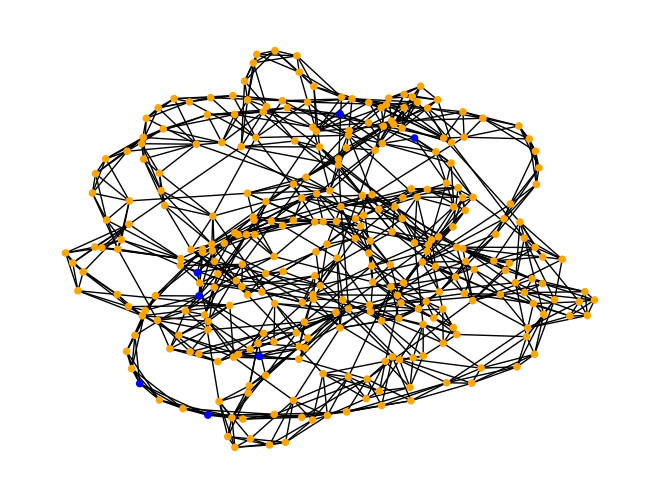

time = 15


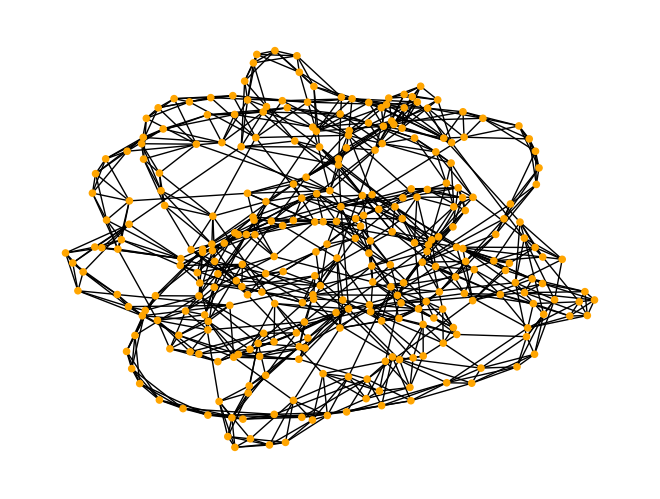

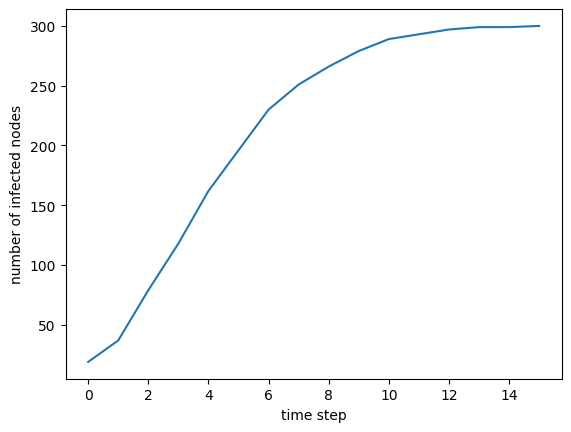

In [3]:
color_dict = {0:'blue',1:'orange'}#blue - healthy, orange - infected
size = 300
G, healthy, infected, pos, n_infected = new_graph(size=size,initial_infections = 20, neighbors_connected= 6, prob_connection=0.1)
evolution, t = evolve_until_all_infected(G, healthy, infected, 0.2, n_infected, pos, color_dict, size)
plot_evolution(evolution,t)